# Introduction

### Importing libraries

In [1]:
# For data creation, mathematics and plotting
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# For neural network modelling
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import metrics



%matplotlib inline

### Version of libraries in use

In [2]:
import matplotlib
print(np.__version__ , ': NumPy Version')
print(matplotlib.__version__, ': Matplotlib version')
print(tf.__version__ , ': Tensorflow Version')

1.21.2 : NumPy Version
3.5.1 : Matplotlib version
2.8.0 : Tensorflow Version


## Creating the dataset

#### Defining Gaussian function

In [3]:
def gauss(x,a,b,c):
    return c*math.e**( (-(x - a)**2)/2*(b**2) ) 

#### Create two peaks using gaussian function
I have used superposition of two gaussian function to create a two peak function. 


$$ F(x) =  c_1 exp \left({\frac{- (x - a_1)^2}{2b_1^2}}\right) + c_2 exp \left({\frac{- (x - a_2)^2}{2b_2^2}}\right) $$

Variable
- $a_1$ = position of peak 1.
- $a_2$ = position of peak 2.
- $b_1$ = standard deviation/sharpness of peak 1. 
- $b_1$ = standard deviation/sharpness of peak 2.
- $c_1$ = height of peak 1.
- $c_2$ = height of peak 2.

These variable can be randomly set up to create a wide diversity of curves for the training dataset. 

In [4]:
def two_peaks_func(x,x_1,y_1,x_2,y_2,b_min):
    a_1 = x_1 #random.uniform(0.1,0.6)
    b_1 = random.uniform(b_min,40)
    a_2 = x_2 #random.uniform(a_1+0.1,0.9)
    b_2 = random.uniform(b_min,40)
    c_1 = y_1 #- gauss(a_1,a_2,b_2,c_2)#random.uniform(0.4,1)
    c_2 = y_2 #- gauss(a_2,a_1,b_1,c_1)#random.uniform(0.4,1)
    return gauss(x,a_1,b_1,c_1) + gauss(x,a_2,b_2,c_2)

I will plot the with x axis from 0 to 1 with 0.01 interval, having an input array of 100elements. This allows us to get a linear relation between x axis values and its index in x axis input array. which is: 
<br>
x axis value = 100 * index value
<br>
To create the x axis input array I have used numpy linespace function.

In [5]:
x_axis = np.linspace(0,0.99,100)

# First 10 values in input array
x_axis[:10]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

Plotting the two peak function for some  input variables.

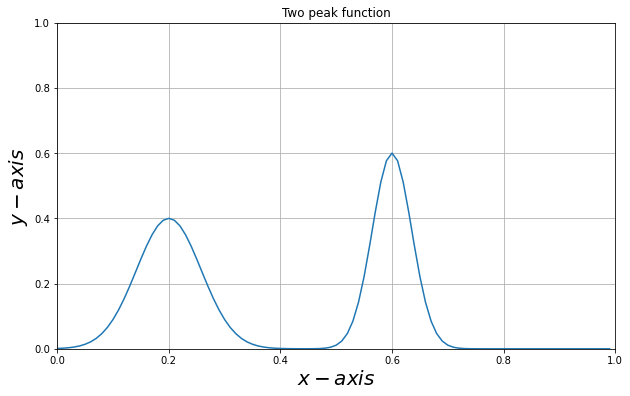

In [6]:
plt.figure(figsize=(10, 6))
plt.title('Two peak function')
plt.grid()
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel(r'$x-axis$',fontsize=20)
plt.ylabel(r'$y-axis$', fontsize=20)

plt.plot(x_axis, two_peaks_func(x_axis,0.2,0.4,0.6,0.6,10))

### A function to create two peaks using random values
Here I have created a function that will assign random values to the variable in two peak gaussian function.
I have used some conditions so that well defined peaks are created. 
<br>


**Condition 1 :** $0.1 < a_1, a_2 < 0.9$ So that peaks dont form at extreme left or right positions.
<br>
<br>
**Condition 2 :** $ a_1 < 0.6 $ and $ a_2 > a_1 + 0.1$ So that peaks dont form at same position.
<br>
<br>
**Condition 2 :**   $ min[b_1], min[b_2] > (a_2 - a_1)*50 $  So that peaks dont overlap.
<br>
<br>
Labels are set us as a numpy array of length 2 have coordinate of peaks as first and second value respectively. Distance is also computed as $|a_2 - a_1|$
<br>
**Output of the function**
- Numpy array of two peak curve.
- Labels for coordinate of peaks.
- Distance between the peaks.

In [7]:
def random_two_peak(x):
    x_1 = round(random.uniform(0.1,0.6),2)
    x_2 = round(random.uniform(x_1 + 0.1, 0.9),2)
    y_1 = random.uniform(0.4,1)
    y_2 = random.uniform(0.4,1)
    b_min = (x_2 - x_1)*50

    labels = np.array([x_1, x_2])
    
    #print(x_1, x_2 )
    #print(x_axis[int(x_1*100)], x_axis[int(x_2*100)])
    
    peak_dist = abs(x_2 - x_1)
    
    return two_peaks_func(x,x_1,y_1,x_2,y_2,b_min), labels, peak_dist

Below I have ploted the two-peak function using matplotlib library.

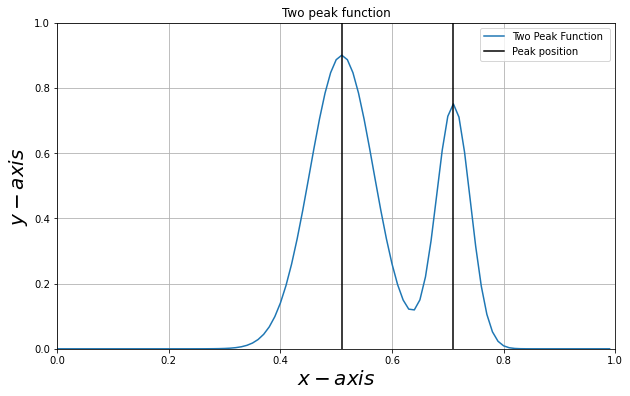

In [8]:
plt.figure(figsize=(10, 6))
plt.title('Two peak function')
plt.grid()
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel(r'$x-axis$',fontsize=20)
plt.ylabel(r'$y-axis$', fontsize=20)


test_random_peak = random_two_peak(x_axis)

plt.plot(x_axis, test_random_peak[0])
#plt.plot(x_axis, test_random_peak[1])

plt.axvline(x=test_random_peak[1][0], color='black')
plt.axvline(x=test_random_peak[1][1], color='black')
plt.legend(['Two Peak Function ','Peak position'])

#### Creating a dataset of 5000 peaks for training and testing
Next step is to create a dataset, which can be easily done by using for loop. 
<Br>
A data basket is created which contains curve data, label data and distance data. It stores data of 5000 two-peak curves.

In [9]:
N = 5000
peaks_data = np.array(random_two_peak(x_axis), dtype=object)

test_data = np.array(peaks_data[0])
label_data = np.array(peaks_data[1])
peak_dist = peaks_data[2]

data = np.array([test_data])
data_label = np.array([label_data])
dist_data = np.array([peak_dist])

for i in range(N - 1):
    peaks_data = np.array(random_two_peak(x_axis), dtype=object)
    
    test_data = np.array(peaks_data[0])
    label_data = np.array(peaks_data[1])
    peak_dist = peaks_data[2]

    data = np.vstack((data, test_data))
    data_label = np.vstack((data_label, label_data))
    dist_data = np.append(dist_data, peak_dist)
    
print(data.shape)
print(data_label.shape)
print(dist_data.shape)

data_basket = [data, data_label, dist_data]

(5000, 100)
(5000, 2)
(5000,)


### Visualising the dataset
16 curves are randomly chosen from the dataset.

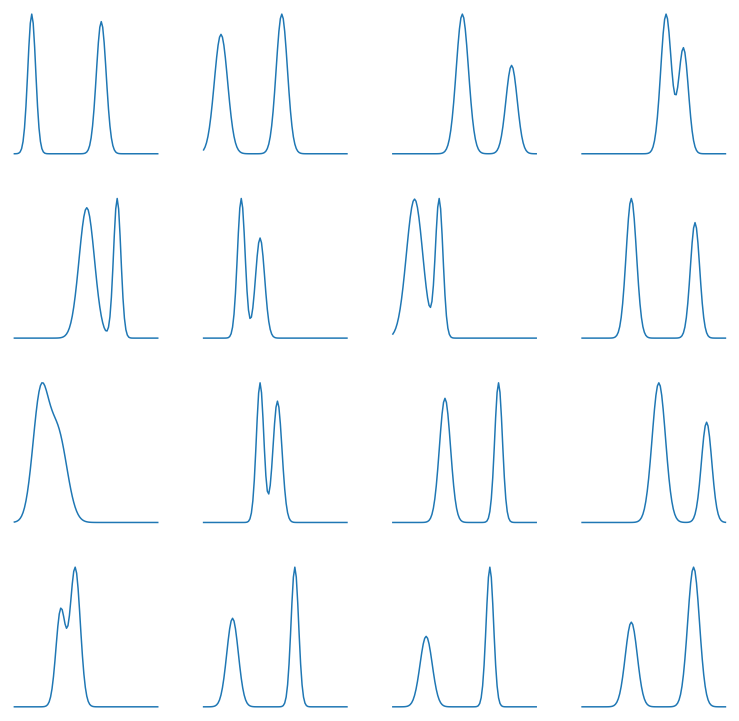

In [10]:
plt.figure(figsize=(13,13))
for i in range(16):
    index = random.randint(0,N)
    plt.subplot(4,4,i + 1)
    plt.plot(x_axis, data[index])
    plt.axis('off')

# Creating the Model

## Approach 1: Using regression

### Extract plot and label Data
Plot data(curve data) and label data is extracted from the data basket for machine learning model.

In [11]:
plot_data = data_basket[0]
label_data = data_basket[1]

In [12]:
input_length = plot_data[0].shape[0]
input_length 

100

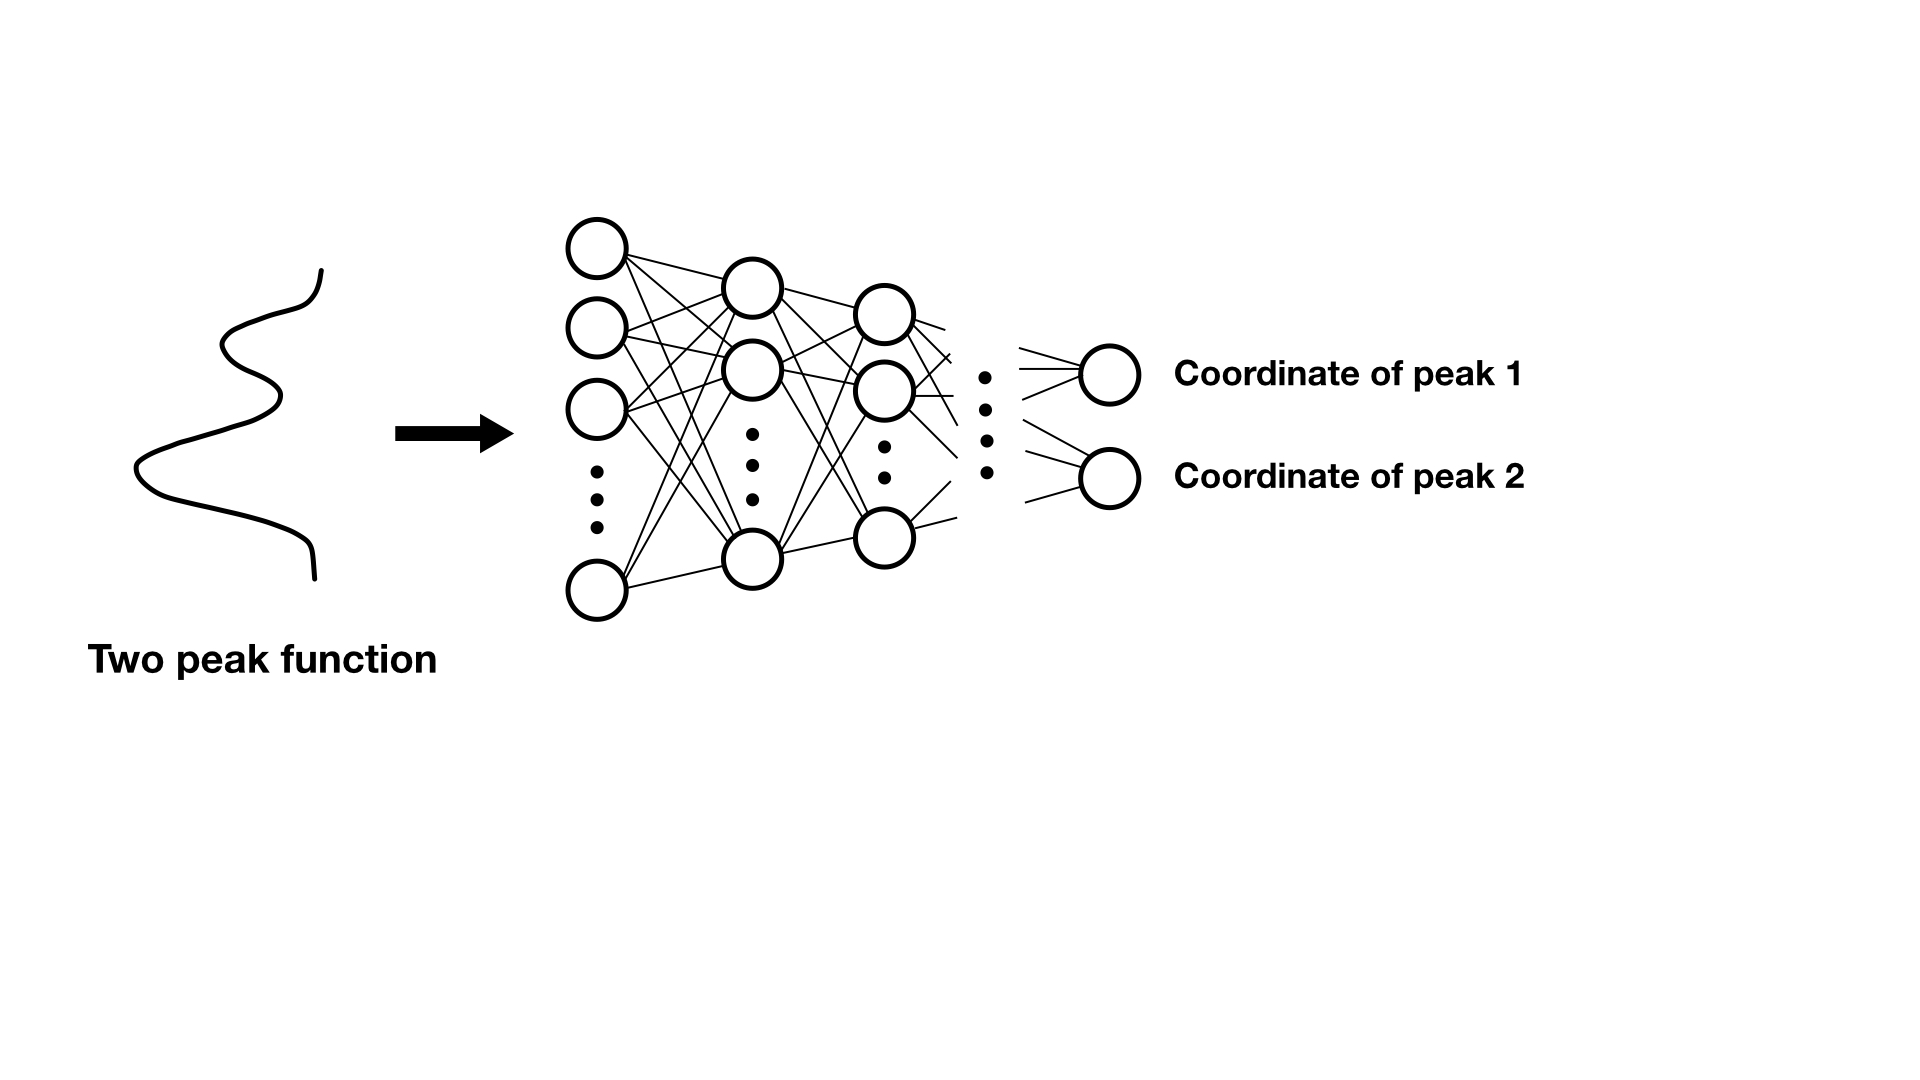

### Sequential Model
A sequential model is made using tensorflow object called sequential. Here, I have created 5 fully connected hidden layers with "ReLU" activation function. 
<br>
Layers are created using tensorflow keras object called `layers`.
<br>
A rescaling layer is added to normalize the data. I have used rescaling factor of two because peaks height are always going to be smaller that 2. I belive this will not affect the peak detection. 
<br>
This model is not tunned for high accuracy.

In [13]:
model_1 = Sequential([
    layers.Rescaling((1./2), input_shape=(input_length,)),
    layers.Dense(100, activation="relu"),#,input_shape=(data_shape,)),
    layers.Dense(80, activation="relu"),
    layers.Dense(50, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(2)
])

# model = Sequential([
#     layers.Rescaling((1./2), input_shape=(input_length,)),
#     layers.Dense(100, activation="relu"),#,input_shape=(data_shape,)),
#     layers.Dense(90, activation="relu"),
#     layers.Dense(80, activation="relu"),
#     layers.Dense(70, activation="relu"),
#     layers.Dense(60, activation="relu"),
#     layers.Dense(50, activation="relu"),
#     layers.Dense(40, activation="relu"),
#     layers.Dense(30, activation="relu"),
#     layers.Dense(20, activation="relu"),
#     layers.Dense(10, activation="relu"),
#     layers.Dense(2)
# ])

Loss function used is Mean squared error. 

In [14]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[metrics.MeanSquaredError()])

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100)               0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 80)                8080      
                                                                 
 dense_2 (Dense)             (None, 50)                4050      
                                                                 
 dense_3 (Dense)             (None, 30)                1530      
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 2)                 2

Changing data type of `plot_data` and `label_data` to 'float32' which is tensorflow compatible.

In [16]:
plot_data = np.asarray(plot_data).astype('float32')
label_data = np.asarray(label_data).astype('float32')

The data is splited into Training and Testing set with a ratio of 4:1. Data is also shuffled but I dont thinks its required here. 

In [17]:
EPOCHS = 100

#plot_data_1 = np.random.random((1000,101))
#label_data_1 = np.random.randint(2, size=(1000,101))

history = model_1.fit(
    plot_data, 
    label_data,
    batch_size = 32,
    callbacks=None,
    verbose=2,
    epochs = EPOCHS,
    validation_split = 0.2,
    validation_data=None,
    shuffle=True
)

Epoch 1/100
125/125 - 1s - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0032 - val_mean_squared_error: 0.0032 - 1s/epoch - 11ms/step
Epoch 2/100
125/125 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - 369ms/epoch - 3ms/step
Epoch 3/100
125/125 - 0s - loss: 7.8879e-04 - mean_squared_error: 7.8879e-04 - val_loss: 6.9556e-04 - val_mean_squared_error: 6.9556e-04 - 389ms/epoch - 3ms/step
Epoch 4/100
125/125 - 0s - loss: 5.0695e-04 - mean_squared_error: 5.0695e-04 - val_loss: 5.1829e-04 - val_mean_squared_error: 5.1829e-04 - 380ms/epoch - 3ms/step
Epoch 5/100
125/125 - 0s - loss: 4.2146e-04 - mean_squared_error: 4.2146e-04 - val_loss: 4.6562e-04 - val_mean_squared_error: 4.6562e-04 - 402ms/epoch - 3ms/step
Epoch 6/100
125/125 - 0s - loss: 3.4198e-04 - mean_squared_error: 3.4198e-04 - val_loss: 3.9050e-04 - val_mean_squared_error: 3.9050e-04 - 410ms/epoch - 3ms/step
Epoch 7/100
125/125 - 0s - loss: 2.9777e-04 - mean_squared_err

Epoch 52/100
125/125 - 1s - loss: 6.5191e-05 - mean_squared_error: 6.5191e-05 - val_loss: 1.0611e-04 - val_mean_squared_error: 1.0611e-04 - 516ms/epoch - 4ms/step
Epoch 53/100
125/125 - 1s - loss: 8.1902e-05 - mean_squared_error: 8.1902e-05 - val_loss: 1.3523e-04 - val_mean_squared_error: 1.3523e-04 - 664ms/epoch - 5ms/step
Epoch 54/100
125/125 - 1s - loss: 6.5540e-05 - mean_squared_error: 6.5540e-05 - val_loss: 9.4543e-05 - val_mean_squared_error: 9.4543e-05 - 544ms/epoch - 4ms/step
Epoch 55/100
125/125 - 0s - loss: 7.1592e-05 - mean_squared_error: 7.1592e-05 - val_loss: 1.1596e-04 - val_mean_squared_error: 1.1596e-04 - 494ms/epoch - 4ms/step
Epoch 56/100
125/125 - 0s - loss: 7.2324e-05 - mean_squared_error: 7.2324e-05 - val_loss: 1.6545e-04 - val_mean_squared_error: 1.6545e-04 - 494ms/epoch - 4ms/step
Epoch 57/100
125/125 - 1s - loss: 6.7679e-05 - mean_squared_error: 6.7679e-05 - val_loss: 9.7925e-05 - val_mean_squared_error: 9.7925e-05 - 545ms/epoch - 4ms/step
Epoch 58/100
125/125 -

### Visulising Training and Testing loss

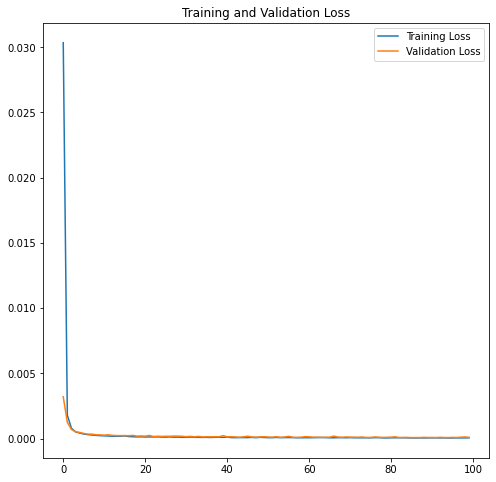

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
#plt.axhline(y=0, color='black')
plt.show()

### Visualizing Predictions
Below is the predictions from on plots from the data.

0.11611146


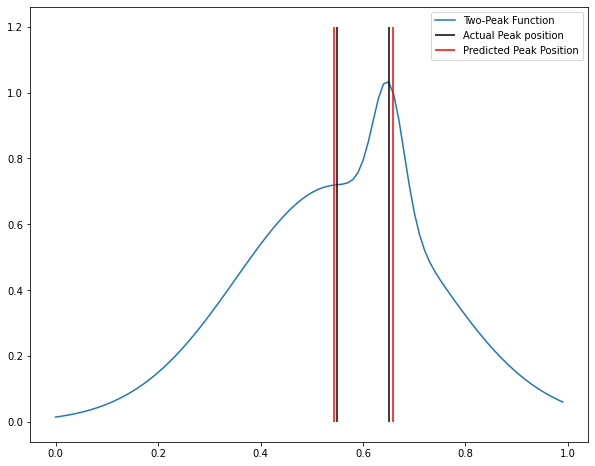

In [19]:
n = random.randint(0,5000)
pred = np.array([plot_data[n]])
lab = label_data[n]
predict = model_1.predict(pred)
print(abs(predict[0][1] - predict[0][0]))
#plt.plot(x_axis, predict[0])
plt.figure(figsize=(10, 8))
plt.plot(x_axis, plot_data[n])

plt.vlines(x=[lab[0], lab[1]], color='black', ymin=0, ymax=1.2)
plt.vlines(x=[predict[0][0], predict[0][1]], color='red', ymin=0, ymax=1.2)

plt.legend(['Two-Peak Function ','Actual Peak position', 'Predicted Peak Position'])

### Some more random prediction plots

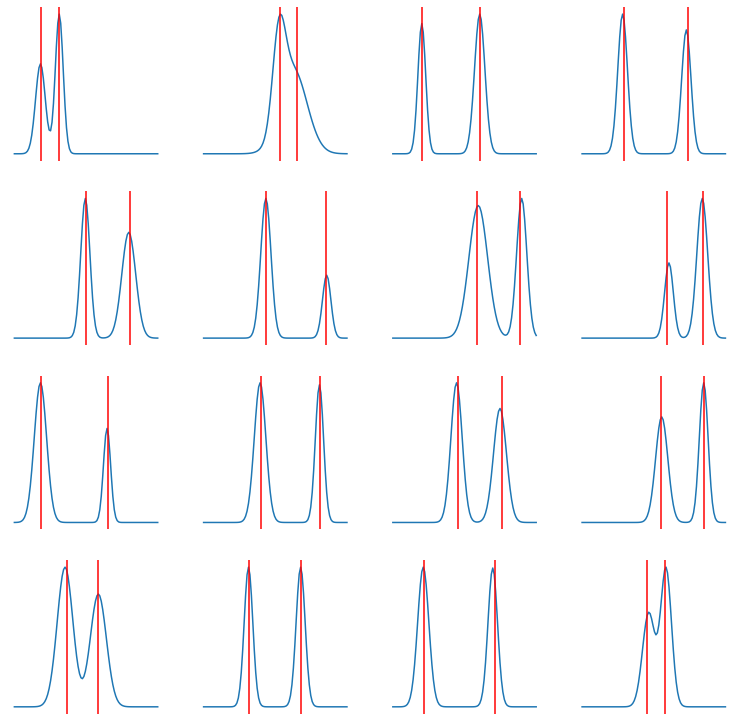

In [20]:
plt.figure(figsize=(13,13))
for i in range(16):
    index = random.randint(0,N)
    pred = np.array([plot_data[index]])
    predict = model_1.predict(pred)
    plt.subplot(4,4,i + 1)
    plt.plot(x_axis, plot_data[index])
    plt.axvline(x=predict[0][0], color='red')
    plt.axvline(x=predict[0][1], color='red')
    plt.axis('off')

### Creating evaluation data

In [21]:
N = 1000
peaks_data = np.array(random_two_peak(x_axis), dtype=object)

test_data = np.array(peaks_data[0])
label_data = np.array(peaks_data[1])
peak_dist = peaks_data[2]

data = np.array([test_data])
data_label = np.array([label_data])
dist_data = np.array([peak_dist])

for i in range(N - 1):
    peaks_data = np.array(random_two_peak(x_axis), dtype=object)
    
    test_data = np.array(peaks_data[0])
    label_data = np.array(peaks_data[1])
    peak_dist = peaks_data[2]

    data = np.vstack((data, test_data))
    data_label = np.vstack((data_label, label_data))
    dist_data = np.append(dist_data, peak_dist)
    
print(data.shape)
print(data_label.shape)
print(dist_data.shape)

eval_data_basket = [data, data_label, dist_data]

(1000, 100)
(1000, 2)
(1000,)


### Prediction on evaluation data

In [22]:
plot_data = eval_data_basket[0]

predict_distance = np.array([])
for i in range(len(plot_data)):
    pred = np.array([plot_data[i]])
    predict = model_1.predict(pred)
    
    #ind = np.argpartition(predict[0], -2)[-2:]
    distance = abs( predict[0][1] - predict[0][0] )

    predict_distance =  np.append(predict_distance, distance)
    
    

In [23]:
predict_distance[:10]

array([0.38305452, 0.47891319, 0.44334105, 0.13800186, 0.15741378,
       0.3328858 , 0.22987221, 0.60892451, 0.28251982, 0.15140343])

In [24]:
actual_distance = eval_data_basket[2]
actual_distance[:10]

array([0.38, 0.48, 0.45, 0.14, 0.13, 0.34, 0.22, 0.61, 0.28, 0.15])

In [25]:
error = actual_distance - predict_distance 
error[:10]

array([-0.00305452,  0.00108681,  0.00665895,  0.00199814, -0.02741378,
        0.0071142 , -0.00987221,  0.00107549, -0.00251982, -0.00140343])

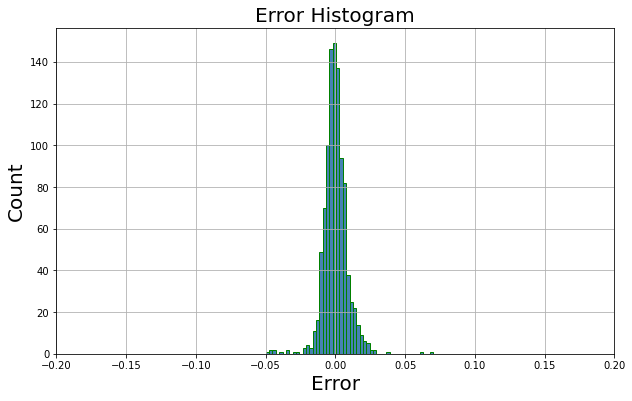

In [26]:
plt.figure(figsize=(10, 6))
plt.title('Error Histogram',fontsize=20)
plt.grid()
plt.xlabel(r'Error',fontsize=20)
plt.ylabel(r'Count', fontsize=20)
plt.xlim([-0.2,0.2])
plt.hist(error, bins=50, histtype='bar', color='steelblue', edgecolor='green' );

# Approach 2

In this Approach I will create a very large Deep Neural network with fullyconnect layers. The difference is that output is also an array of length 100 unlike in Approch 1 where output is just two numbers which are coordinates of peaks. Here it will output a discreate curve which will peak at the predicted peak points. 
<br>
Therefore, Labels are also different rather tha just 2 number it is now an array with all elements zero except where peak is, there the value is 1.

#### Redefining `random_two_peak` function to output new labels

In [27]:
def random_two_peak(x):
    x_1 = round(random.uniform(0.1,0.6),2)
    x_2 = round(random.uniform(x_1 + 0.1, 0.9),2)
    y_1 = random.uniform(0.4,1)
    y_2 = random.uniform(0.4,1)
    b_min = (x_2 - x_1)*50

    #labels = np.array([x_1, x_2])
    labels = np.zeros(100)
    labels[int(x_1*100)] = 1
    labels[int(x_2*100)] = 1
    
    #print(x_1, x_2 )
    #print(x_axis[int(x_1*100)], x_axis[int(x_2*100)])
    
    peak_dist = abs(x_2 - x_1)
    
    return two_peaks_func(x,x_1,y_1,x_2,y_2,b_min), labels, peak_dist

Below I have ploted the two-peak function using matplotlib library.

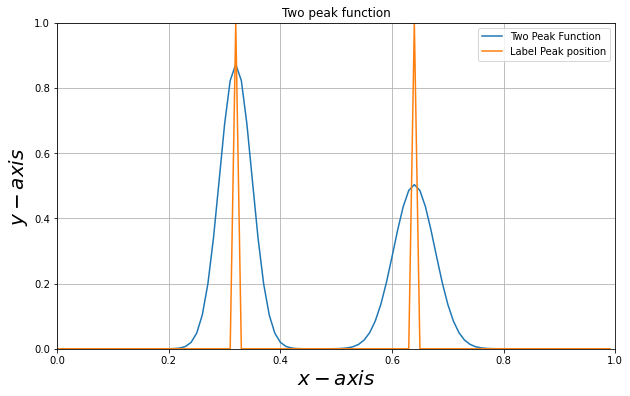

In [28]:
plt.figure(figsize=(10, 6))
plt.title('Two peak function')
plt.grid()
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel(r'$x-axis$',fontsize=20)
plt.ylabel(r'$y-axis$', fontsize=20)


test_random_peak = random_two_peak(x_axis)

plt.plot(x_axis, test_random_peak[0])
plt.plot(x_axis, test_random_peak[1])
plt.legend(['Two Peak Function ','Label Peak position'])

#### Creating a dataset of 5000 peaks for training and testing
Next step is to create a dataset, which can be easily done by using for loop. 
<Br>
A data basket is created which contains curve data, label data and distance data. It stores data of 5000 two-peak curves.

In [29]:
N = 5000
peaks_data = np.array(random_two_peak(x_axis), dtype=object)

test_data = np.array(peaks_data[0])
label_data = np.array(peaks_data[1])
peak_dist = peaks_data[2]


data_element = np.array([test_data, label_data])
data = np.array([[test_data, label_data]])
dist_data = np.array([peak_dist])



for i in range(N - 1):
    peaks_data = np.array(random_two_peak(x_axis), dtype=object)
    
    test_data = np.array(peaks_data[0])
    label_data = np.array(peaks_data[1])
    peak_dist = peaks_data[2]
    
    #conc = np.vstack((test_data,label_data))
    #data = np.vstack((data, [conc]))
    data_element = np.array([test_data, label_data])
    data = np.vstack((data, [data_element]))
    dist_data = np.append(dist_data, peak_dist)
    
print(data.shape)
print(dist_data.shape)

data_basket = [data, dist_data];

(5000, 2, 100)
(5000,)


### Extract plot and label Data
Plot data(curve data) and label data is extracted from the data basket for machine learning model.

In [30]:
plot_data = data_basket[0][:,0]
label_data = data_basket[0][:,1]

In [31]:
input_length = plot_data.shape[1]
input_length

100

# Creating the Model

### Sequential Model
A sequential model is made using tensorflow object called sequential. Here, I have created 3 fully connected hidden layers with "ReLU" activation function. Length of each layer is 100. 
<br>
Layers are created using tensorflow keras object called `layers`.
<br>
A rescaling layer is added to normalize the data. I have used rescaling factor of two because peaks height are always going to be smaller that 2. I belive this will not affect the peak detection. 
<br>
This model is not tunned for high accuracy.

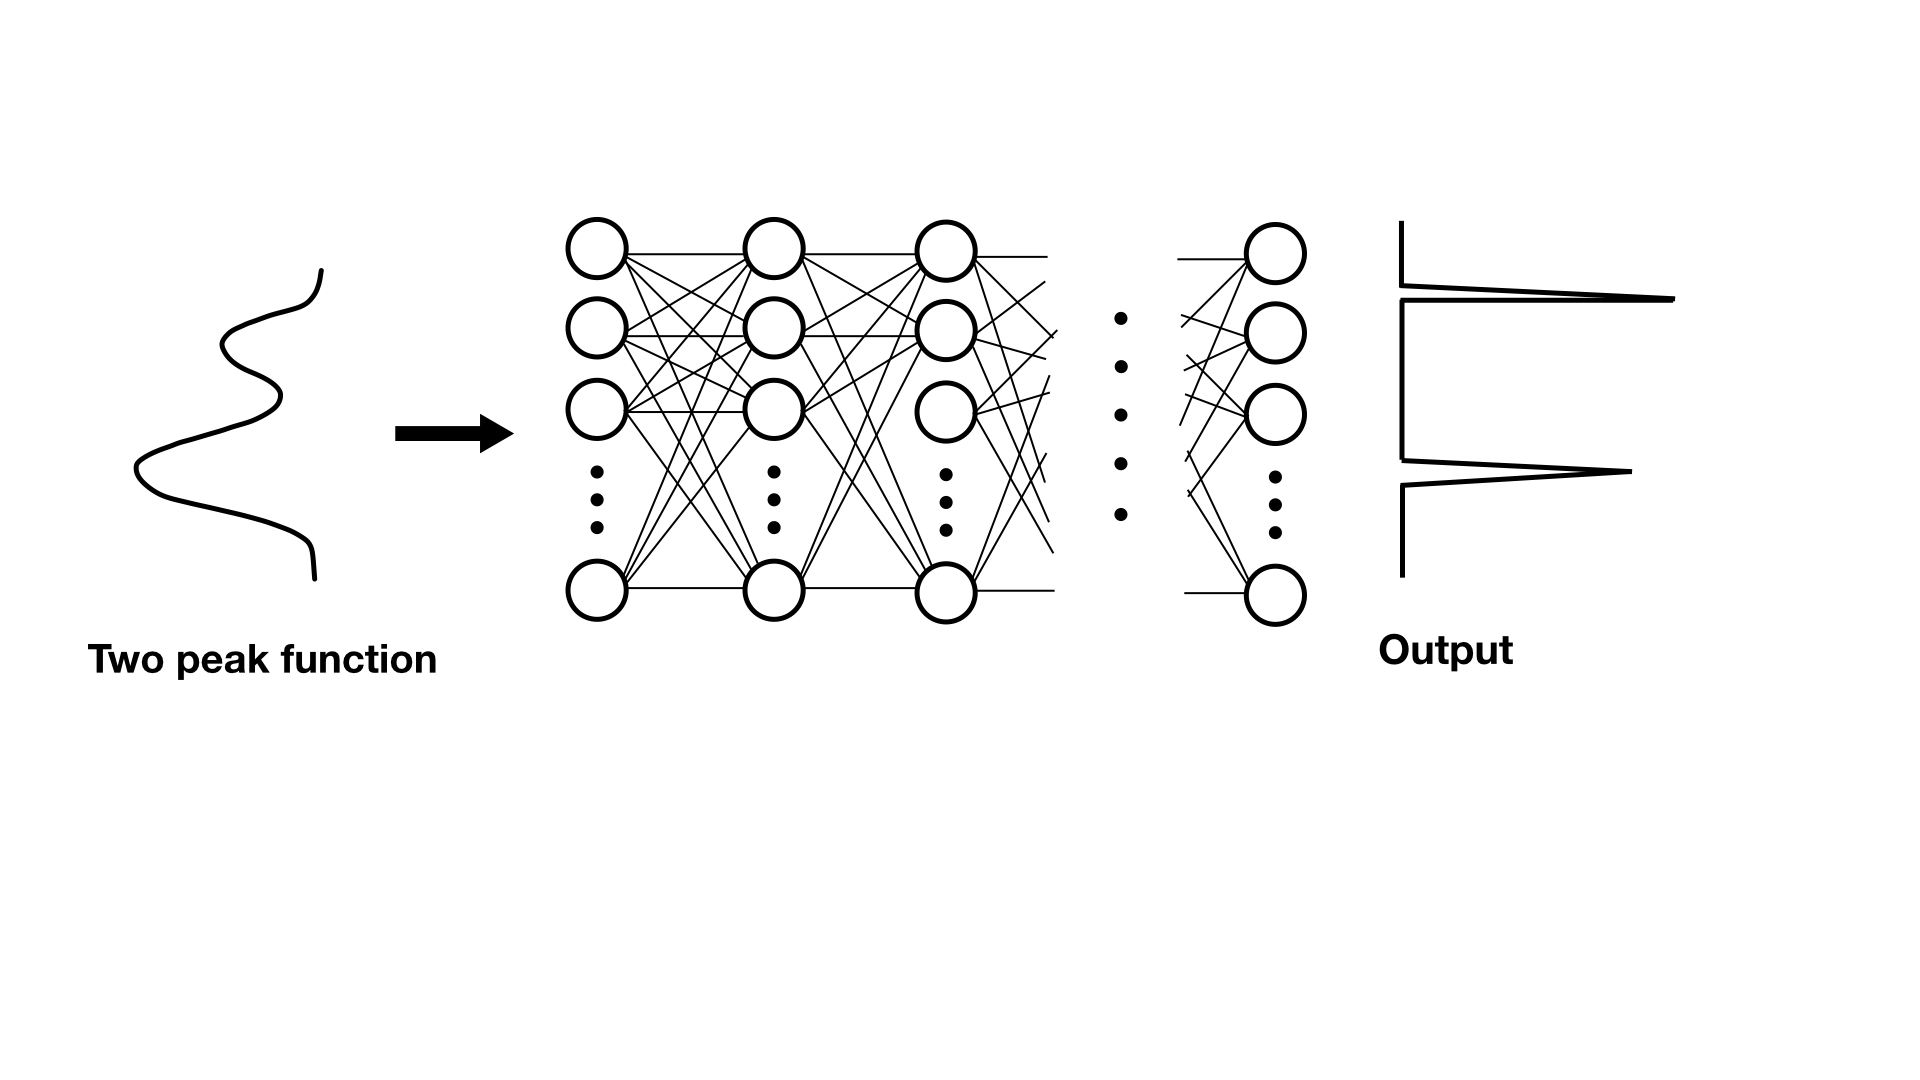

In [32]:
model_2 = Sequential([
    layers.Rescaling((1./2), input_shape=(input_length,)),
    layers.Dense(input_length, activation="relu"),#,input_shape=(data_shape,)),
    layers.Dense(input_length, activation="relu"),
    layers.Dense(input_length, activation="relu"),
    layers.Dense(input_length)
])

Loss function used is Mean squared error. 

In [33]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [34]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
Total params: 40,400
Trainable params: 40,400
Non-trainable params: 0
_________________________________________________________________


The data is splited into Training and Testing set with a ratio of 4:1. Data is also shuffled but I dont thinks its required here.

<br>
Changing data type of `plot_data` and `label_data` to 'float32' which is tensorflow compatible.

In [35]:
EPOCHS = 100
plot_data = np.asarray(plot_data).astype('float32')
label_data = np.asarray(label_data).astype('float32')

#plot_data_1 = np.random.random((1000,101))
#label_data_1 = np.random.randint(2, size=(1000,101))

history = model_2.fit(
    plot_data, 
    label_data,
    batch_size = 32,
    callbacks=None,
    verbose=2,
    epochs = EPOCHS,
    validation_split = 0.2,
    validation_data=None,
    shuffle=True
)

Epoch 1/100
125/125 - 1s - loss: 0.0187 - accuracy: 0.0995 - val_loss: 0.0175 - val_accuracy: 0.1340 - 1s/epoch - 9ms/step
Epoch 2/100
125/125 - 0s - loss: 0.0167 - accuracy: 0.1963 - val_loss: 0.0163 - val_accuracy: 0.2160 - 460ms/epoch - 4ms/step
Epoch 3/100
125/125 - 0s - loss: 0.0157 - accuracy: 0.2380 - val_loss: 0.0156 - val_accuracy: 0.2600 - 469ms/epoch - 4ms/step
Epoch 4/100
125/125 - 0s - loss: 0.0151 - accuracy: 0.2797 - val_loss: 0.0150 - val_accuracy: 0.2760 - 489ms/epoch - 4ms/step
Epoch 5/100
125/125 - 0s - loss: 0.0145 - accuracy: 0.3047 - val_loss: 0.0144 - val_accuracy: 0.3150 - 445ms/epoch - 4ms/step
Epoch 6/100
125/125 - 0s - loss: 0.0140 - accuracy: 0.3343 - val_loss: 0.0140 - val_accuracy: 0.3130 - 341ms/epoch - 3ms/step
Epoch 7/100
125/125 - 0s - loss: 0.0135 - accuracy: 0.3370 - val_loss: 0.0136 - val_accuracy: 0.3190 - 325ms/epoch - 3ms/step
Epoch 8/100
125/125 - 0s - loss: 0.0131 - accuracy: 0.3498 - val_loss: 0.0133 - val_accuracy: 0.3470 - 335ms/epoch - 3ms/

Epoch 66/100
125/125 - 0s - loss: 0.0039 - accuracy: 0.4383 - val_loss: 0.0047 - val_accuracy: 0.4350 - 436ms/epoch - 3ms/step
Epoch 67/100
125/125 - 1s - loss: 0.0039 - accuracy: 0.4378 - val_loss: 0.0047 - val_accuracy: 0.4370 - 505ms/epoch - 4ms/step
Epoch 68/100
125/125 - 0s - loss: 0.0039 - accuracy: 0.4350 - val_loss: 0.0047 - val_accuracy: 0.4320 - 466ms/epoch - 4ms/step
Epoch 69/100
125/125 - 0s - loss: 0.0038 - accuracy: 0.4410 - val_loss: 0.0046 - val_accuracy: 0.4360 - 351ms/epoch - 3ms/step
Epoch 70/100
125/125 - 0s - loss: 0.0038 - accuracy: 0.4457 - val_loss: 0.0046 - val_accuracy: 0.4280 - 345ms/epoch - 3ms/step
Epoch 71/100
125/125 - 0s - loss: 0.0037 - accuracy: 0.4405 - val_loss: 0.0045 - val_accuracy: 0.4430 - 342ms/epoch - 3ms/step
Epoch 72/100
125/125 - 0s - loss: 0.0037 - accuracy: 0.4425 - val_loss: 0.0045 - val_accuracy: 0.4390 - 350ms/epoch - 3ms/step
Epoch 73/100
125/125 - 0s - loss: 0.0037 - accuracy: 0.4437 - val_loss: 0.0045 - val_accuracy: 0.4370 - 371ms/e

### Visulising Training and Testing Accuracy and loss

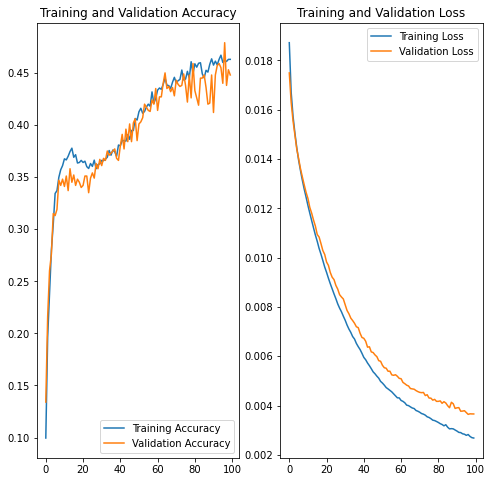

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Visualizing Predictions
Below is the predictions from on plots from the data.

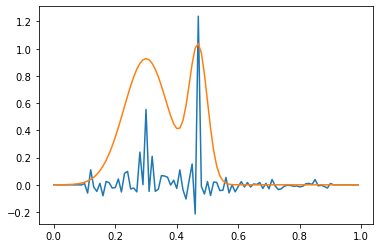

In [37]:
n = random.randint(0,5000)
pred = np.array([plot_data[n]])
predict = model_2.predict(pred)
predict.shape
plt.plot(x_axis, predict[0])
plt.plot(x_axis, plot_data[n])


### Some more random prediction plots

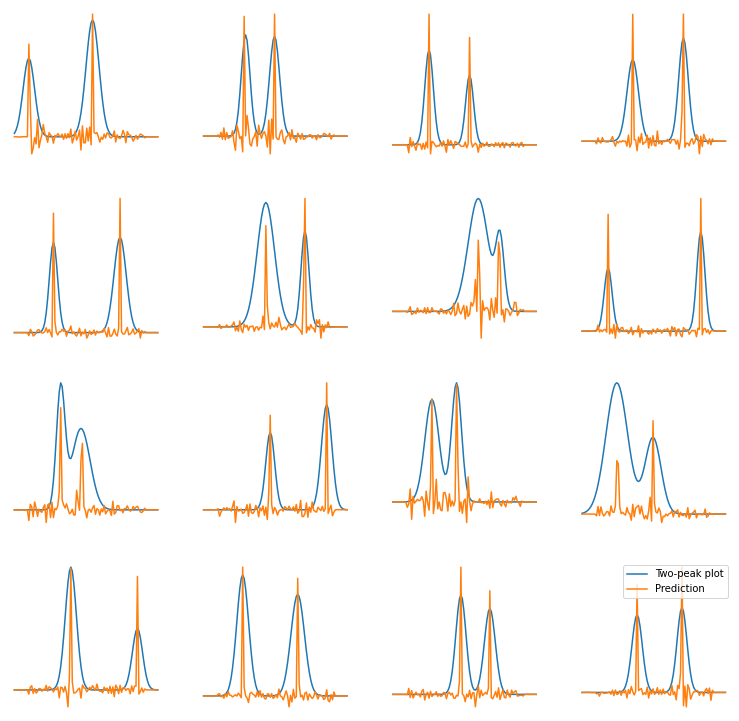

In [38]:
plt.figure(figsize=(13,13))
for i in range(16):
    index = random.randint(0,N-1)
    pred = np.array([plot_data[index]])
    predict = model_2.predict(pred)
    plt.subplot(4,4,i + 1)
    plt.plot(x_axis, plot_data[index])
    plt.plot(x_axis, predict[0])
    #plt.axvline(x=predict[0][0], color='red')
    #plt.axvline(x=predict[0][1], color='red')
    plt.axis('off')
plt.legend(['Two-peak plot', 'Prediction'])

### Creating evaluation data
Creating another data basket with 1000 data points.

In [39]:
N = 1000
peaks_data = np.array(random_two_peak(x_axis), dtype=object)

test_data = np.array(peaks_data[0])
label_data = np.array(peaks_data[1])
peak_dist = peaks_data[2]


data_element = np.array([test_data, label_data])
data = np.array([[test_data, label_data]])
dist_data = np.array([peak_dist])



for i in range(N - 1):
    peaks_data = np.array(random_two_peak(x_axis), dtype=object)
    
    test_data = np.array(peaks_data[0])
    label_data = np.array(peaks_data[1])
    peak_dist = peaks_data[2]
    
    #conc = np.vstack((test_data,label_data))
    #data = np.vstack((data, [conc]))
    data_element = np.array([test_data, label_data])
    data = np.vstack((data, [data_element]))
    dist_data = np.append(dist_data, peak_dist)
    
print(data.shape)
print(dist_data.shape)

eval_data_basket = [data,dist_data]

(1000, 2, 100)
(1000,)


### Prediction on evaluation data

In [40]:
plot_data = data_basket[0][:,0]
#label_data = data_basket[0][:,1]

predict_distance = np.array([])
for i in range(len(plot_data)):
    pred = np.array([plot_data[i]])
    predict = model_2.predict(pred)
    
    ind = np.argpartition(predict[0], -2)[-2:]
    distance = abs((ind[0] - ind[1])/100)
    predict_distance = np.append(predict_distance, distance)

In [41]:
predict_distance[:10]

array([0.2 , 0.27, 0.21, 0.59, 0.32, 0.27, 0.5 , 0.5 , 0.21, 0.41])

In [42]:
actual_distance = data_basket[1]
actual_distance[:10]

array([0.2 , 0.27, 0.21, 0.59, 0.32, 0.27, 0.5 , 0.5 , 0.21, 0.41])

In [43]:
error = actual_distance - predict_distance 
error[:10]

array([-5.55111512e-17, -1.11022302e-16,  2.77555756e-17,  0.00000000e+00,
       -5.55111512e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.32667268e-17,  5.55111512e-17])

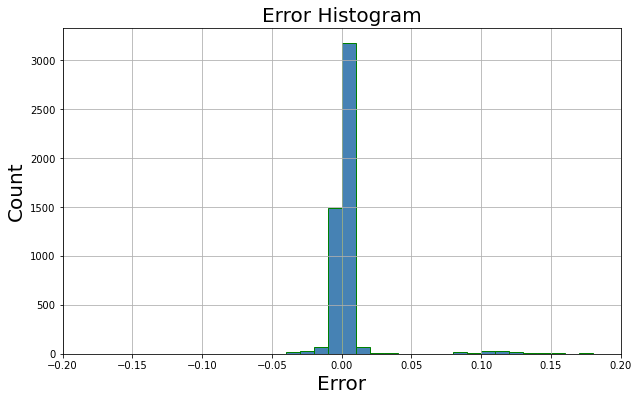

In [44]:
plt.figure(figsize=(10, 6))
plt.title('Error Histogram',fontsize=20)
plt.grid()
plt.xlabel(r'Error',fontsize=20)
plt.ylabel(r'Count', fontsize=20)
plt.xlim([-0.2,0.2])
plt.hist(error, bins=50, histtype='bar', color='steelblue', edgecolor='green' );